In [1]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

In [2]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

DATA CLEANING & EXPLORATION
---
>

In [3]:
df_all.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0


DEPARTMENT EXPLORATION
---
>

In [11]:
def Apercentage(df,column_names):
    results = {}
    for column_name in column_names:
        values = df[column_name].unique()
        for column_value in values:
            yes_counts = df[df[column_name] == column_value]['Attrition'].value_counts().get('Yes', 0)
            total_counts = df[df[column_name] == column_value]['Attrition'].count()
            percentage_of_attrition = yes_counts / total_counts * 100

            results[column_value] = percentage_of_attrition
    
    return results

NOMBRE D'EMPLOYEE PAR DEPARTEMENT

In [15]:
df_all['Department'].value_counts()

Department
Research & Development    2807
Sales                     1307
Human Resources            186
Name: count, dtype: int64

<Axes: ylabel='Department'>

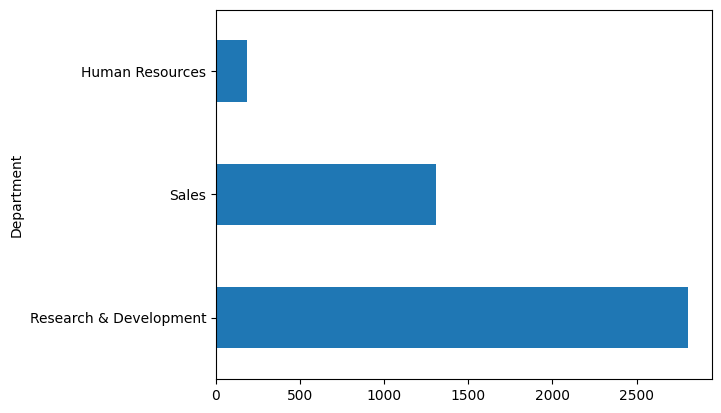

In [14]:
df_all['Department'].value_counts().plot(kind='barh')

In [67]:
yes_c=df_all['Attrition'].value_counts().get('Yes',0)
total=df_all['Attrition'].count()
Attrition_rate= yes_c/total * 100
Attrition_rate

16.162790697674417

ATTRITION RATE BY DEPARTMENT

In [12]:
Department = ['Department']
dep=Apercentage(df_all,Department)
dep

{'Sales': 15.14919663351186,
 'Research & Development': 15.781973637335234,
 'Human Resources': 29.03225806451613}

<Axes: >

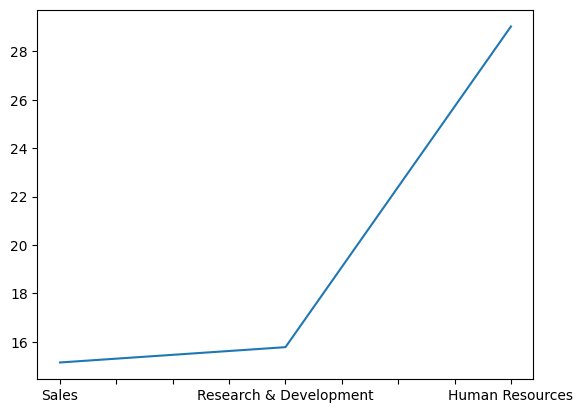

In [17]:
pd.Series(dep).plot()

HR ATTRITION RATE HIGHER THAN THE OTHERS. LET'S DIG INTO IT.

In [25]:
JobSatisfaction_by_Department=df_all.pivot_table(index=['Department'], values=['JobSatisfaction'], aggfunc='mean')
JobSatisfaction_by_Department

,JobSatisfaction
Department,
Human Resources,2.693548
Research & Development,2.703598
Sales,2.775057


<Axes: xlabel='Department'>

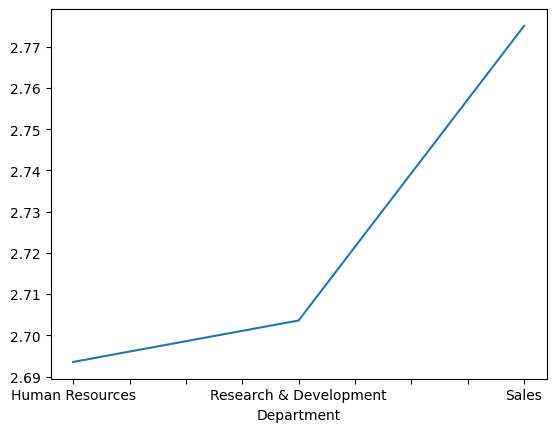

In [42]:
df_all.groupby('Department')['JobSatisfaction'].mean().plot()

In [ ]:
NEGLIGEABLE

In [26]:
EnvironmentSatisfaction_by_Department=df_all.pivot_table(index=['Department'], values=['EnvironmentSatisfaction'], aggfunc='mean')
EnvironmentSatisfaction_by_Department

,EnvironmentSatisfaction
Department,
Human Resources,2.833333
Research & Development,2.717848
Sales,2.721500


AUCUNE CORRELATION

In [27]:
WorkLifeBalance_by_Department=df_all.pivot_table(index=['Department'], values=['EnvironmentSatisfaction'], aggfunc='mean')
WorkLifeBalance_by_Department

,EnvironmentSatisfaction
Department,
Human Resources,2.833333
Research & Development,2.717848
Sales,2.721500


AUCUNE CORRELATION

In [22]:

filtered_df = df_all[df_all['Department'] == 'Human Resources']
value_counts = filtered_df['JobSatisfaction'].value_counts()
total_count = filtered_df['JobSatisfaction'].count()
percentages = (value_counts / total_count) * 100
percentages

JobSatisfaction
4.0    33.870968
3.0    23.655914
1.0    22.043011
2.0    20.430108
Name: count, dtype: float64

AUCUNE CORRELATION

BUSINESS TRAVEL FREQUENCY ON ATTRITION

In [30]:
BusinessTravel = ['BusinessTravel']
travel_attrition=Apercentage(df_all,BusinessTravel)
travel_attrition

{'Travel_Rarely': 15.077023926581449,
 'Travel_Frequently': 24.598269468479607,
 'Non-Travel': 8.181818181818182}

Text(0.5, 1.0, 'Attrition Rate by Travel Frequency')

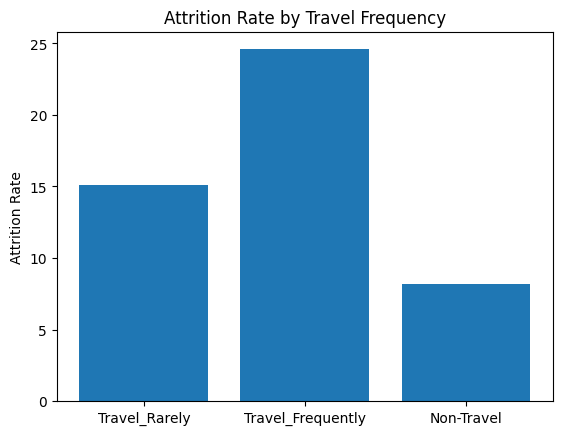

In [31]:
plt.bar(list(travel_attrition.keys()), list(travel_attrition.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Travel Frequency')


THERE IS A HIGHER ATTRITION RATE ON EMPLOYEE THAT TRAVEL FREQUENTLY LET'S WHICH DEPARTMENT IS THE MOST AFFECTED

In [29]:
df_all.groupby('Department')['BusinessTravel'].value_counts()

Department              BusinessTravel   
Human Resources         Travel_Rarely         154
                        Travel_Frequently      23
                        Non-Travel              9
Research & Development  Travel_Rarely        1977
                        Travel_Frequently     507
                        Non-Travel            323
Sales                   Travel_Rarely         920
                        Travel_Frequently     279
                        Non-Travel            108
Name: count, dtype: int64

In [37]:
travel_df = df_all[df_all['Department'] == 'Human Resources']['BusinessTravel'].value_counts().get('Travel_Frequently', 0)
travel_counts = df_all[df_all['Department'] == 'Human Resources']['BusinessTravel'].count()
travellers=travel_df/travel_counts *100
travellers

12.365591397849462

In [38]:
rd_df = df_all[df_all['Department'] == 'Research & Development']['BusinessTravel'].value_counts().get('Travel_Frequently', 0)
rd_counts = df_all[df_all['Department'] == 'Research & Development']['BusinessTravel'].count()
rd=rd_df/rd_counts *100
rd

18.061987887424298

In [41]:
sales_df = df_all[df_all['Department'] == 'Sales']['BusinessTravel'].value_counts().get('Travel_Frequently', 0)
sales_travel_counts = df_all[df_all['Department'] == 'Sales']['BusinessTravel'].count()
sales=sales_df/sales_travel_counts *100
sales

21.346595256312163

SALES DEP IS ON TOP, SO NO CORRELATION WITH HR DEP. LET SEE IF THERE IS ANY CORRELATION WITH THE PERCENT SALARY HIKE

Text(0.5, 1.0, 'Mean Percent Salary Hike by Department')

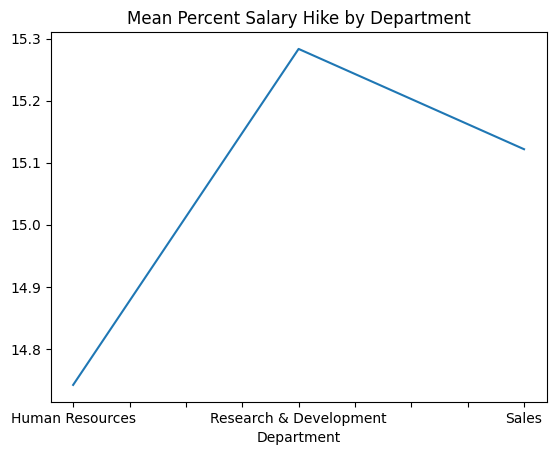

In [50]:
df_all.groupby('Department')['PercentSalaryHike'].mean().plot()
plt.title('Mean Percent Salary Hike by Department')


WE CAN SEE THAT THE LINE MIRROR THE ATTRITION RATE LINE SO THIS MIGHT BE SOMETHING TO DIVE IN, LET'S SEE PERCENT SALARY HIKE VS OTHER METRICS WITH THE HELP OF A CORRELATION MATRIX

In [72]:
df_num=df_all.select_dtypes(include='number')
salaryhikecorr=df_num.corr()

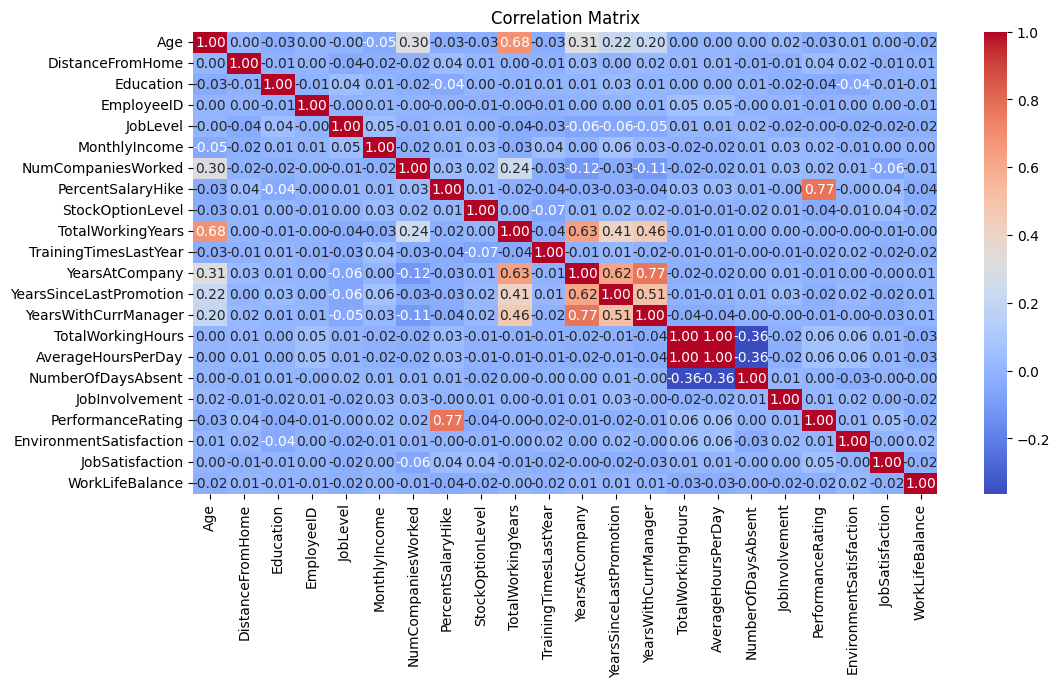

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(salaryhikecorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

STRONG CORRELATION WITH PERFORMANCE RATING, LET'S SEE HOW HR DEP DOES

<Axes: xlabel='Department'>

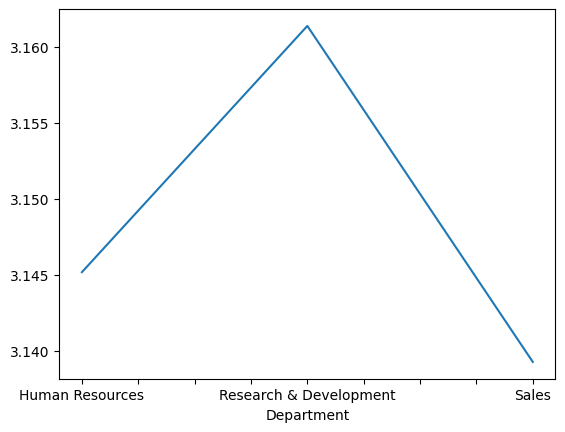

In [77]:
df_all.groupby('Department')['PerformanceRating'].mean().plot()

In [90]:
df_all.groupby('Department')['PerformanceRating'].mean()

Department
Human Resources           3.145161
Research & Development    3.161382
Sales                     3.139250
Name: PerformanceRating, dtype: float64

NO REAL CORRELATION BETWEEN THE TWO, LET'S SEE HOW MANY YEARS HR EMPLOYEE HAVE TO WAIT UNTIL THEY GOT A PROMOTION

In [81]:
df_all['DurationInPosition'] = df_all['YearsAtCompany'] - df_all['YearsSinceLastPromotion']

In [82]:
df_all.groupby('Department')['DurationInPosition'].mean()

Department
Human Resources           3.994624
Research & Development    4.942643
Sales                     4.726855
Name: DurationInPosition, dtype: float64

HOW LONG THEY STAY BEEN IN THE COMPANY

In [84]:
df_all.groupby('Department')['YearsAtCompany'].mean()

Department
Human Resources           5.704301
Research & Development    7.165657
Sales                     6.914308
Name: YearsAtCompany, dtype: float64

HR DEP EMPLOYEE ARE THE LATEST, LET'S GROUP THEM BY AGE

<Axes: xlabel='Department'>

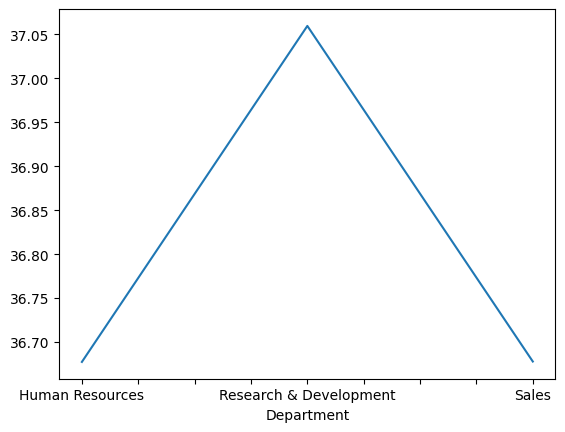

In [86]:
df_all.groupby('Department')['Age'].mean().plot()

In [101]:
df_all.groupby('Department')['Age'].mean()

Department
Human Resources           36.677419
Research & Development    37.059494
Sales                     36.677888
Name: Age, dtype: float64

In [102]:
df_all.groupby('Department')['NumCompaniesWorked'].mean()

Department
Human Resources           2.048387
Research & Development    2.778055
Sales                     2.592196
Name: NumCompaniesWorked, dtype: float64

In [ ]:
HR DEP EMPLOYEE ARE AMONG THE YOUNGEST WITH SALES EMPLOYEE. 
HR DEP EMPLOYEE HAVE THE HIGHEST ATTRITION RATE,
THE LOWEST PERCENT SALARY HIKE AND ARE AMONG THE MOST RECENT TO GET INTO THIS COMPANY,
PROBABLY RECENTLY GRADUATE ACCORDING TO THE MEAN OF NUMBER COMPANIES WORKED ,
THEY ALSO HAVE THE LOWEST JOB SATISFACTION RATE,

YOUNG GRADUATE IN HR FIELD ARE LOOKING FOR QUICK PROMOTION AND EXPERIENCES MAYBE THE COMPANIE SHOULD PROPOSE FOR THE NEXT TALENT BASH SOME MORE ATTRACTIVE SALARY 

JOB ROLE EXPLORATION
---
>

AGE GROUPS EXPLORATION
---
>

OVERTIME EXPLORATION
---
>

In [105]:
Overtime = df_all[df_all['AverageHoursPerDay'] > 480]
Overtime

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DurationInPosition
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,Female,4,...,7,153412,614.0,12,3,3,3.0,2.0,2.0,0
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,11,Male,2,...,10,121406,486.0,8,2,3,3.0,4.0,3.0,16
11,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,Female,1,...,13,127702,511.0,20,3,3,4.0,1.0,3.0,32
12,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,Male,1,...,9,132434,530.0,14,2,3,1.0,2.0,2.0,1
16,37,No,Non-Travel,Research & Development,1,3,Medical,18,Male,2,...,2,162469,650.0,3,3,3,1.0,4.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,Male,1,...,12,133230,533.0,5,2,3,1.0,3.0,4.0,18
4283,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,Male,3,...,2,150820,603.0,9,3,3,4.0,3.0,1.0,2
4292,45,No,Travel_Frequently,Sales,21,1,Marketing,4402,Male,3,...,2,121294,485.0,5,2,3,1.0,3.0,3.0,3
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,2,128538,514.0,6,3,3,4.0,1.0,3.0,3


ATTRITION RATE OVERTIMERS

In [107]:
yes_overtime=Overtime['Attrition'].value_counts().get('Yes',0)
total_overtime=Overtime['Attrition'].count()
Attrition_rate_overtimers= yes_overtime/total_overtime * 100
Attrition_rate_overtimers

29.497716894977167

ATTRITION RATE BY DEPARTMENT OVERTIMERS

In [109]:
Department = ['Department']
dep_o=Apercentage(Overtime,Department)
dep_o

{'Research & Development': 31.224209078404403,
 'Sales': 22.653721682847898,
 'Human Resources': 44.06779661016949}

<Axes: >

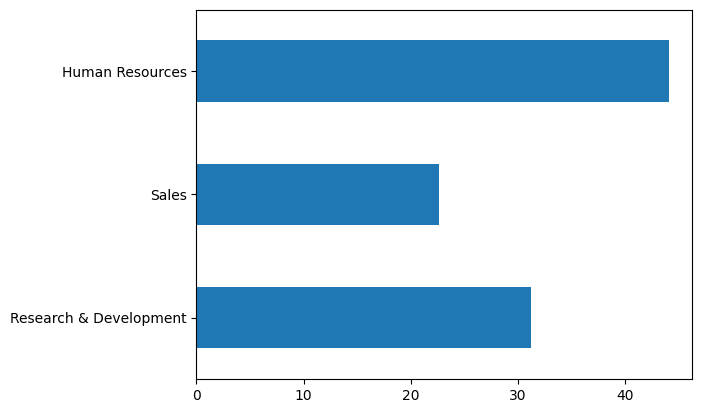

In [112]:
pd.Series(dep_o).plot(kind='barh')